# Intro to Seaborn #

As you have seen, visualization is important in data exploration.  In the two previous lessons, we've looked at some of _matplotlib's_ capabilities, which are very powerful.  They ARE powerful, but can be very tedious.  Another module, _Seaborn_ was written to make graphs easier.  _Seaborn_ is not independent, but builds on _matplotlib's_ strengths so to use _Seaborn,_ you must import both.

**Type and enter the code from the subsequent sections in your own Jupyter Notebook**, as well as creating extra cells to complete the exercises.

__Setup__

In [1]:
# Setup
import seaborn as sns     # sns is the standard alias for seaborn
import matplotlib.pyplot as plt


One benefit of using _Seaborn_ is that it has a collection of datasets that are commonly used.  We're going to use these as examples throughout.  To display them, type this in the cell.

__Seaborn data sets__

In [5]:
# Seaborn data sets
import bs4   # bs4 (Beautiful Soup) is a Python library for pulling data out of HTML and XML files
print(sns.__version__)

print(sns.get_dataset_names())


0.10.1
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']



Quite a list!  Car_crashes is about bad drivers and their accidents and insurance rates.  iris contains the famous Fisher iris data set. The data set consists of measurements of 150 flower samples from each of three species of flowers: Iris setosa, Iris virginica, and Iris versicolor. The measurements are in mm. Four features were measured for each sample - petal and sepal length and width.  tips lists the total bill amount, tip amount, and gender, among other things, from a waiter's tip book.  titanic lists 892 passengers and statistics about them, to include whether they survived or not.


 Dataset |  Rows  | Columns
 -----------|:-----:|:-----:
car_crashes| 52 | 8
iris | 150 | 6
mpg  | 398 | 7
penguins | 347 | 7
planets | 1036 | 6
tips | 244 | 7
titanic | 892 | 15

So, let's look at tips.  

In [6]:
# Setup
tips=sns.load_dataset('tips')  # load the dataset
print(type(tips))
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


***
__Exercise 1__  Load and do the same to penguins.
***

Let's first look at the size of tips in relation to the total bill.  total_bill is the independent variable, so it goes on the x-axis.  $relplot()$ is used to get the scatter plot.  The arguments are _total_bill_ on the x-axis, _tip_ on the y-axis and using the _tips_ dataframe.

__Example 1:__

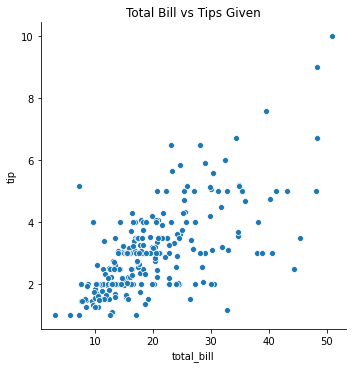

In [7]:
# Example 1
sns.relplot(x='total_bill', y='tip', data=tips)
plt.title("Total Bill vs Tips Given")
plt.show()

Wow, simple graph - not that much harder than matplotlib.. 



***
__Exercise 2:__  Generate a scatter plot with the penguin data, with body mass as independent variable and flipper length as the dependent variable.
    
***


Now let's make this fun and do something that would be VERY difficult in _matplotlib_.

Let's look at the same data, broken out by gender.  _kind_ tells us to do a line graph, and _hue_ picks the variable to separate.  

__Example 2:__

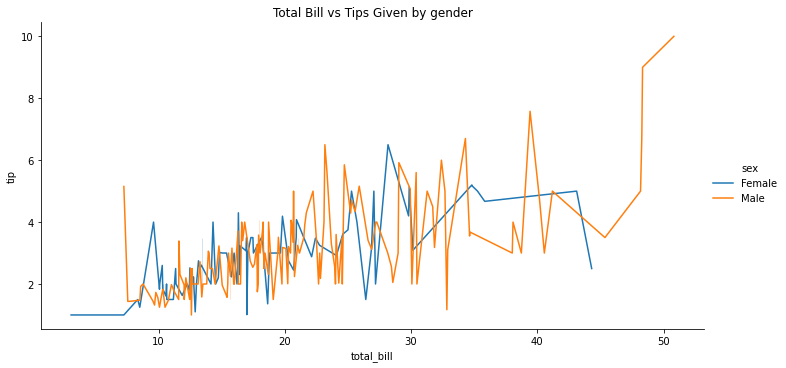

In [8]:
# Example 2
sns.relplot(x='total_bill', y='tip', data=tips,kind='line', hue='sex', aspect=2)
plt.title("Total Bill vs Tips Given by gender")
plt.show()

By the higher variability, it looks like there were more male datapoints than female. 

***
__Exercise 3:__  Generate the same graph for the penguins, based on the species.
    
***

So, from the head description above, there were 244 data points - how many are male and how many are female?
One way to do this is to import Counter, and then ask it for the most common. As there are only 2 possible values, 
the frequency of each is given.

__Example 3:__


In [9]:
# Example 3
from collections import Counter
Counter(tips.sex).most_common(2)

[('Male', 157), ('Female', 87)]

So, there are almost twice as many males in this data set.  

***
__Exercise 4:__  How many penguins are there in each species listed?
***

Let's have Python draw a best-fit line - called a regression graph - so the function is _regplot._

__Example 4:__

Text(0.5, 1.0, 'Total Bill vs Tips Given with Best fit line')

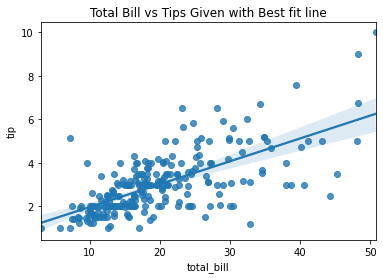

In [10]:
# Example 4
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title("Total Bill vs Tips Given with Best fit line")

Looking at this and the best fit line, it seems better to work at a more inexpensive restaurant.  Looking at the 10 dollar total bill, most tips are between 15 and 20 percent (1.50 to 2 dollars).  The 20 dollar total bill tips range from 2 to 5 dollars, and, if you assume a 15 percent tip, that should be 3 dollars, so higher percentage for the server.  The challenge is in the larger amounts, the percentages seem to be less than the suggested 15 percent.  

***
__Exercise 5:__  Draw a best-fit line for mass and flipper length.
***

Since this is employment, we don't work everyday, all day - what would be the best days to work?  To do that, let's look at the amount of tips, based on the day of the week.  _day_ is words (characters), so we're going to generate a graph based on 'Category'.

__Example 5:__


Text(0.5, 1.0, 'Tips by Day of the Week')

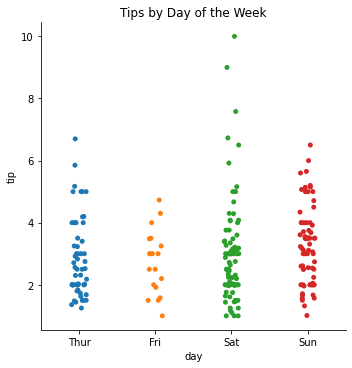

In [11]:
# Example 5
sns.catplot(x='day', y='tip',data=tips)
plt.title("Tips by Day of the Week")

This is good, but we can't tell how many dots are in each time - 
they overlap with each other.  This graph is good if you know you only have one or two values for each one, but we don't with this dataset.  

***
__Exercise 6:__ Plot the mass of the penguins dataset based on species.
***

A _swarm_ plot avoids the overlapping of the points, so you can see where the points are grouped more obviously.

__Example 6:__

Text(0.5, 1.0, 'Tips by Day of the Week')

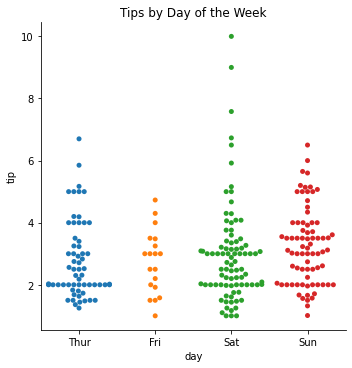

In [12]:
# Example 6
sns.catplot(x='day', y='tip',data=tips,kind='swarm')
plt.title("Tips by Day of the Week")

From this, we can see exactly how many of each value of the tips - there is no overlap.  Two dollars is a common tip amount, no matter the day!  

***
__Exercise 7:__ Repeat for the penguins.
***

I do see a large variability in the values, so let's look at an error bar chart, ignoring the Friday data.  We need to add the _order_ parameter, listing just the values you want included.

__Example 7:__

Text(0.5, 1.0, 'Tips by Day of the Week by Gender')

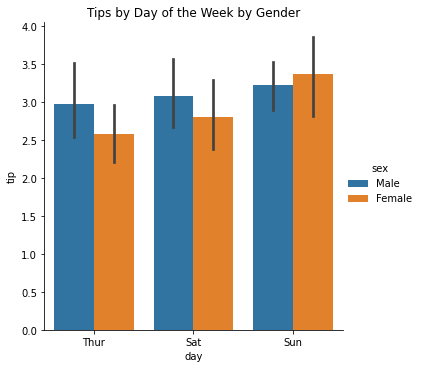

In [13]:
# Example 7
sns.catplot(x='day', y='tip',data=tips,kind='bar', hue='sex',order=['Thur','Sat','Sun'])
plt.title("Tips by Day of the Week by Gender")

Wow, not what I expected!  From the previous graph, I thought the servers would make more tips on Saturdays, but from this, the higher averages are from ladies on Sundays.  Assuming the same number of tables served, the server would make more money from females, which goes against the stereotype.  It has the largest error bars, which indicates lots of variability. 

***
__Exercise 8:__  Generate the same graph, by penguin species.

***

Means are the most sensitive to large extremes, so what about the median?  Boxplots are great for looking at those, so let's use Seaborn's boxplot.

__Example 8:__


Text(0.5, 1.0, 'Tips by Day of the Week by Gender')

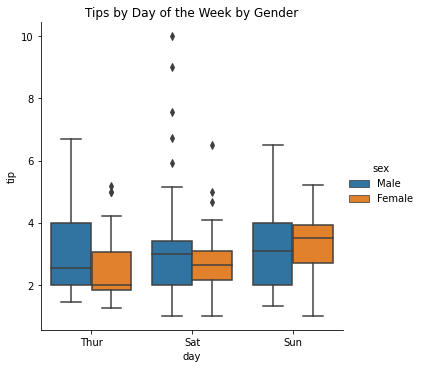

In [14]:
# Example 8
sns.catplot(x='day', y='tip',data=tips,kind='box', hue='sex',order=['Thur','Sat','Sun'])
plt.title("Tips by Day of the Week by Gender")

SOOO much more information from this plot than the error bar graph.  Just to refresh, in a boxplot, the median is the line in the middle of each box, which is the middle value of all the data.  The top of the box is the 75 percent value, the bottom of the box is the 25 percent value.  The top and bottom whisker is the largest and smallest value, respectively, within 1.5 times the box size.  So, on Sundays, while the ladies show the largest average amount of tips, the boxplot provides much more detail.  The median for the ladies is larger, but the top of the boxes (75 percent values) are almost the same.  The top of the whiskers on Sunday shows larger values, and the lower whisker shows that the ladies give a larger range of tips between 0 and 25 percent.  And look at Saturday!  The lower whisker is the same, but male guests give a much greater range, up to the max of ten dollar tips.  If you're a male waiter, go work on Saturdays!  So, is this because he is out on a date and wants to impress his guest?  But the smallest tip on Saturday is the same, so it pays to wait on a male on Saturday!

***
__Exercise 9:__  Do the same for the penguins.  What did you learn from this when compared to the error bar chart?
***

Another plot that presents the distribution of data is a histogram.  Let's look at how _Seaborn_ graphs histograms.  The _bins_ is the number of bins that the data is distributed in.  Here we look at the distribution of the _total_bill._

__Example 9:__


Text(0.5, 1.0, 'Distribution of Total Bill')

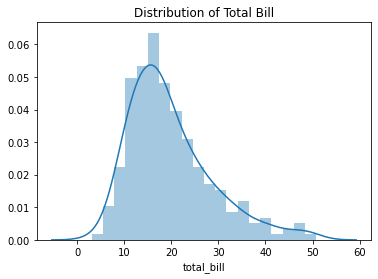

In [15]:
# Example 9
sns.distplot(a=tips.total_bill, bins=20)
plt.title("Distribution of Total Bill")

As can be seen by this histogram, it is not a normal distribution, but left shifted.  Most bills are less than 20 dollars, but a good number is between 20 and 30 dollars.  This data would be of interest to the restaurant owner/investor.

***
__Exercise 10:__  What is the distribution of the penguin mass?  Discuss what you see.

***

Let's do some more exploring of the _hue_ command.  Going back to the line plot from before, I wanted to see more of the data, so I removed the _kind='line'_ and was able to generate this graph.  It shows each value where many were hidden by the lines.

__Example 10:__

Text(0.5, 1.0, 'Total Bill vs Tips Given by gender')

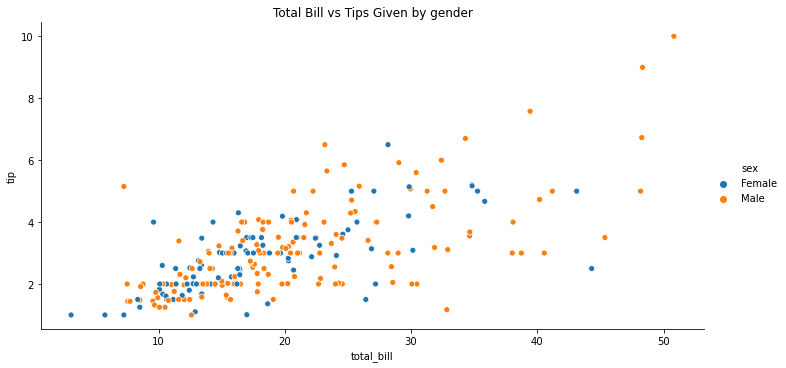

In [16]:
# Example 10
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex', aspect=2)
plt.title("Total Bill vs Tips Given by gender")


Now let's look at a little more complicated data so we can try a few new things.  _mpg_ shows cars with engine size, year of production and miles per gallon, among other things.  

In [17]:
# Data Exploration
mpg=sns.load_dataset('mpg')  # load the dataset
mpg.info

<bound method DataFrame.info of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu

So, after the index, the next column is mpg, number of cylinders, displacement, horsepower, weight and more. 

Let's look at the horsepower based on the year of the car.  Another plot, called a _violin_ plot, provides even more details than a boxplot.  Let's plot both to compare.

__Example 11:__

Text(0.5, 1.0, 'Engine displacement in cars by country of origin')

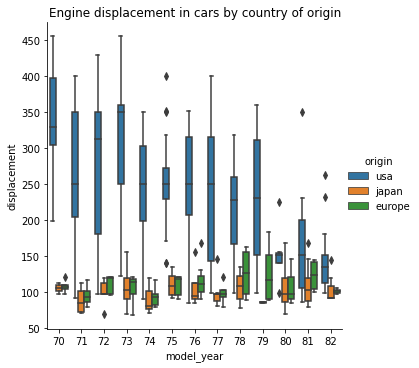

In [18]:
# Example 11
sns.catplot(x='model_year', y='displacement',data=mpg,kind='box',hue='origin')
plt.title("Engine displacement in cars by country of origin")

Wow, this is a busy chart, but pretty interesting!  Japan just started shipping cars to the US in the early 70s.  Notice that the cars they sent us had (relatively) tiny engines, and look at how large the US engines were. Even the smallest US engine was double the size of the Japanese or European engines. American automakers must have noticed how those cars were selling, and started creating a wider range of engine sizes, hence the larger boxplot in the mid 70s (except for 1975).  The Arab Oil Embargo in the early 1970s probably contributed significantly - larger engines require more fuel - and the Oil Embargo quadrupled the price of gas per gallon.  While this dataset doesn't have the sales data, it would be interesting to see a weighted listing of what size engines sold how many.

But let's get back to the _violin_ plot.  A _violin_ plot is like a boxplot, but shows the data distribution of the data through the thickness of the violin.

__Example 12:__

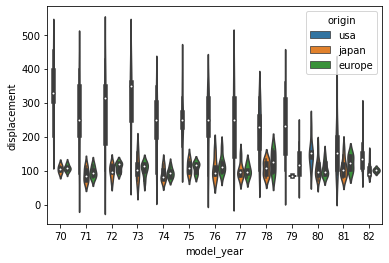

In [19]:
# Example 12
sns.violinplot(x='model_year', y='displacement',data=mpg,kind='box',hue='origin')

Again, too busy. Let's try a boxplot and a violin plot with only the usa data.

__Example 13:__

Text(0.5, 1.0, 'Engine displacement in cars by model year')

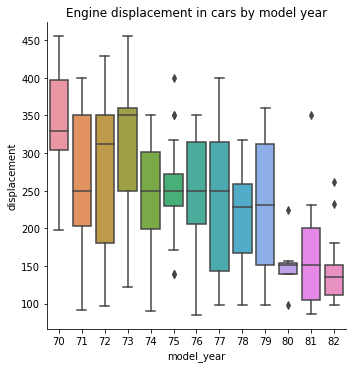

In [20]:
# Example 13
import pandas as pd    # must have pandas for this

usa_mpg = mpg[mpg['origin'].isin(['usa'])]   # just find those with 'usa' in the origin field

sns.catplot(x='model_year', y='displacement',data=usa_mpg,kind='box')
plt.title("Engine displacement in cars by model year")

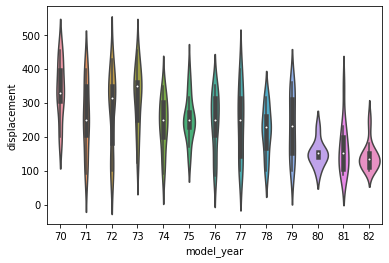

In [21]:
# Better violin plot
sns.violinplot(x='model_year', y='displacement',data=usa_mpg,kind='box')

In comparing these two types of plots with the same data, you can really see how the data is structured.  For example, in 1970, the data is fairly evenly distributed from top to bottom, where in 1980 and 1982, it very definitely is not.

Another fun plot that _Seaborn_ makes much easier is a parameter by parameter comparison, called a _pairplot._  A _pairplot_ plots pairwise relationships with the defaults of histograms along the diagonal and scatterplots for each pairing.

__Example 14:__

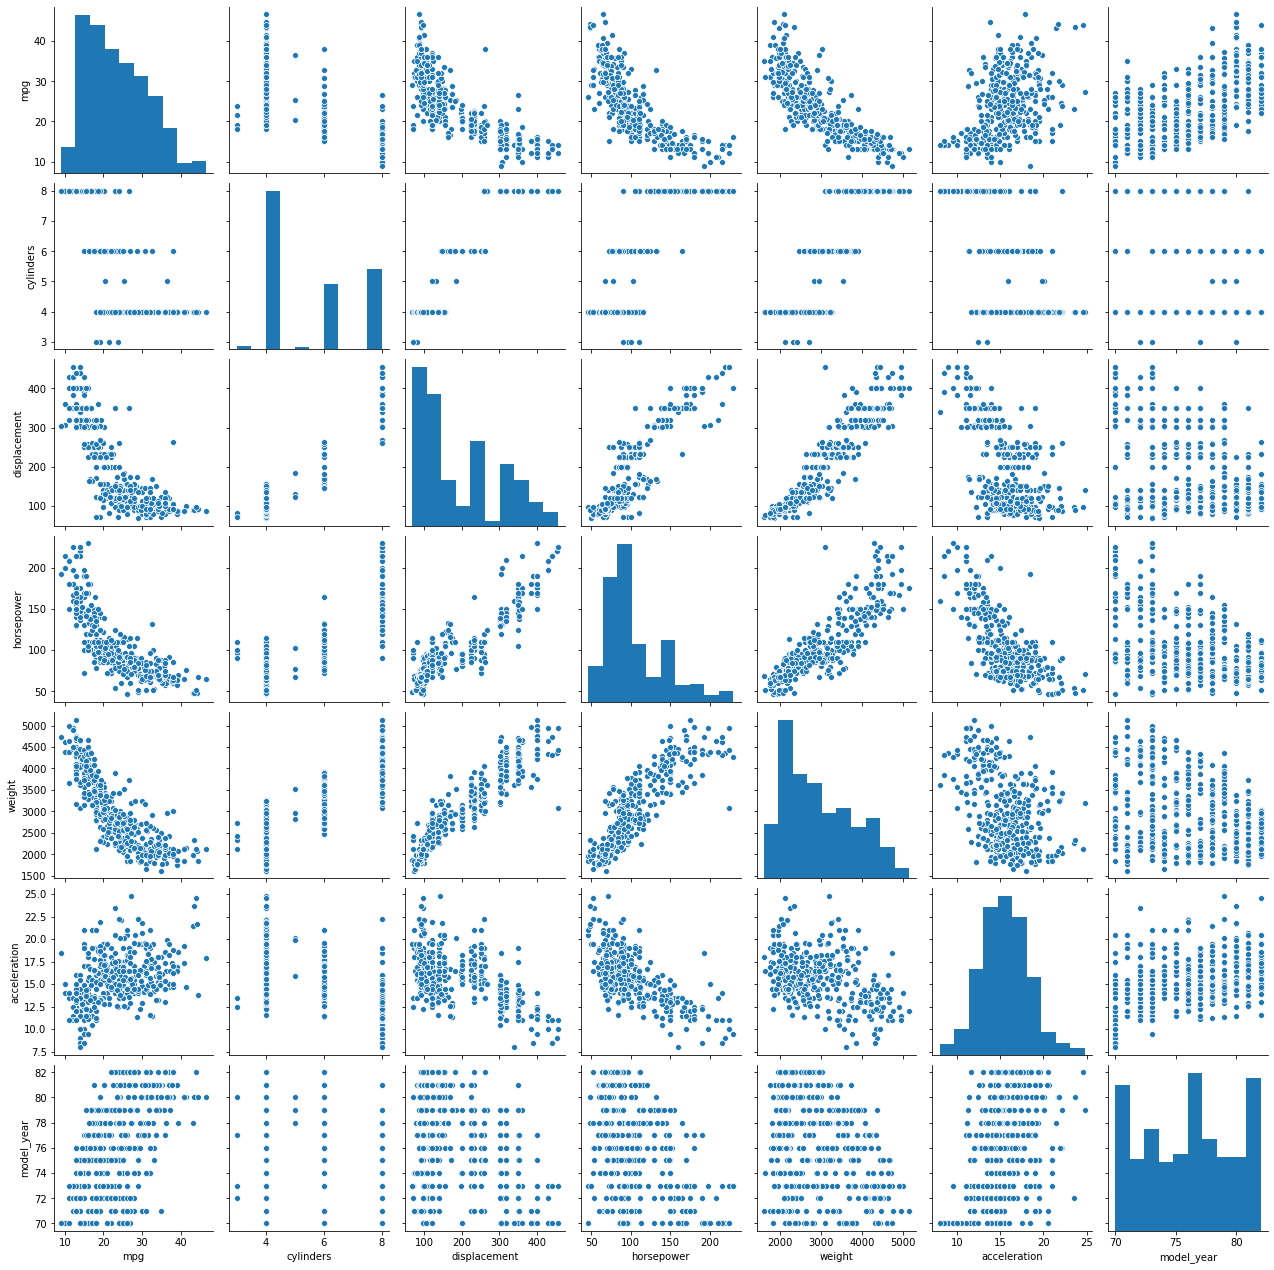

In [22]:
# Example 14
sns.pairplot(mpg)

Wow, such a lot of figures to look at!  A fast way to see many relationships.  Let's break out the data more, by changing colors based on the country of origin.



C:\Users\Dawn Roberson\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Dawn Roberson\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


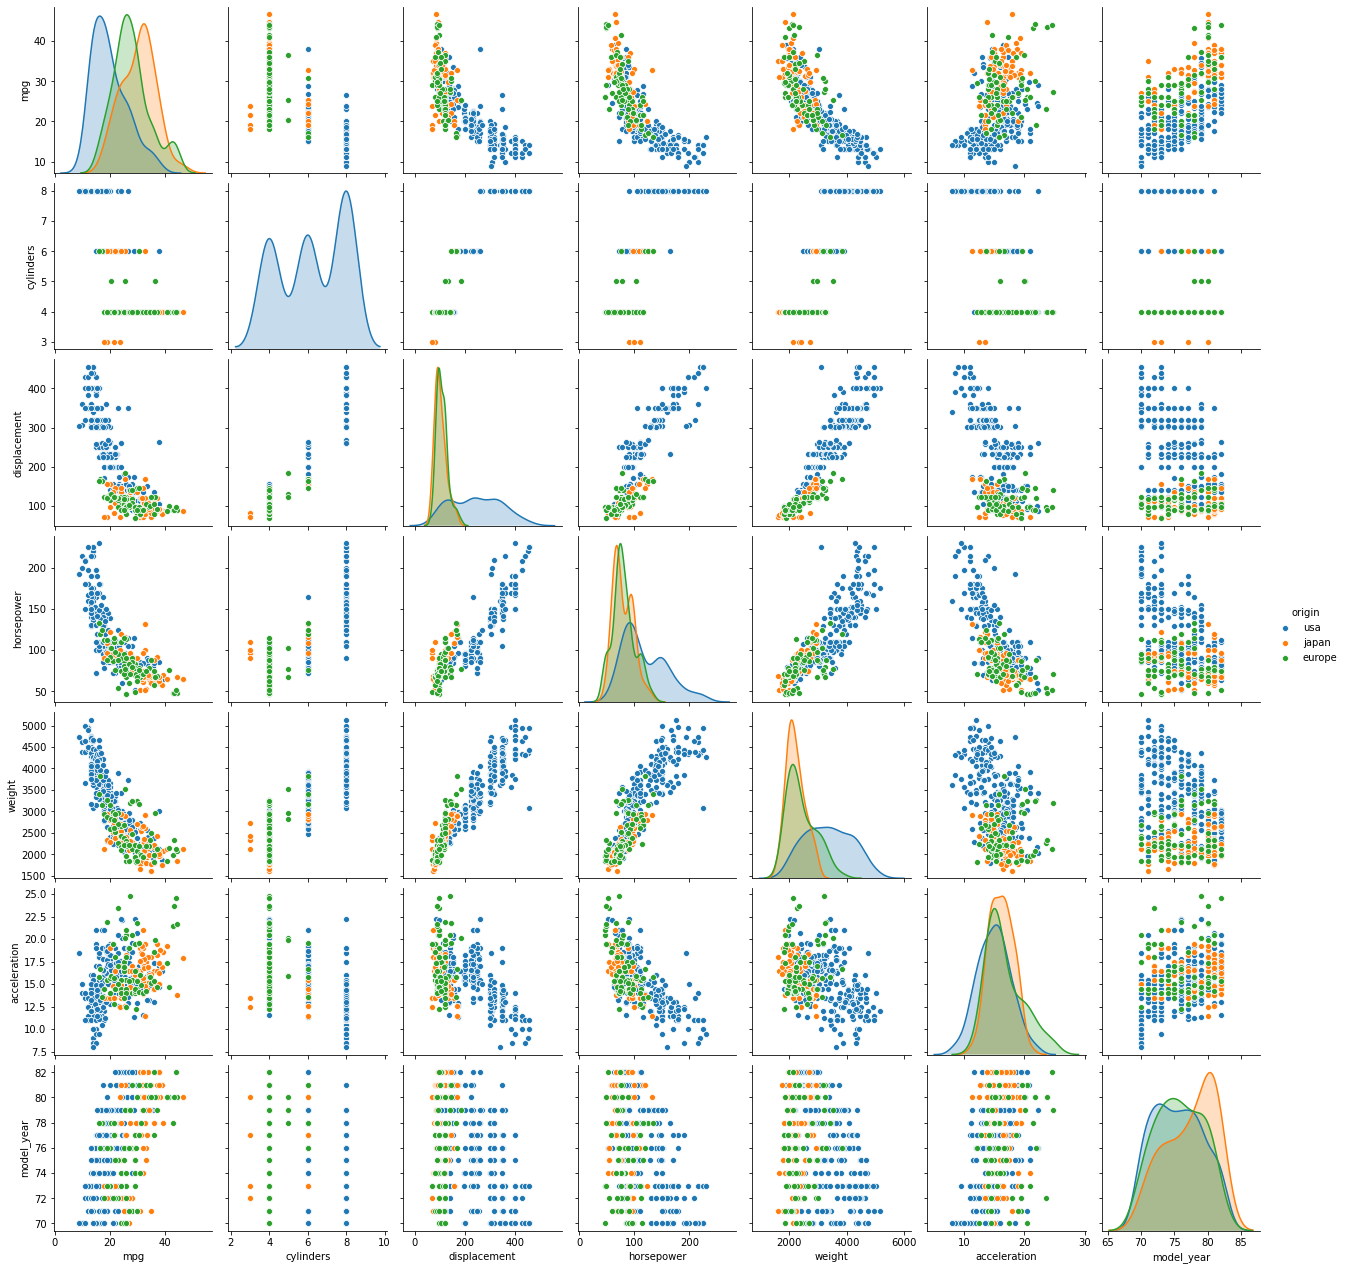

In [23]:
# Example 14 - more colors
sns.pairplot(mpg,hue='origin')

_Seaborn_ is powerful and has many more graphics.  This was just an exposure - don't be afraid to search online.

***
__Exercise 11:__  Load the titanic data.  Plot boxplot and violin plots looking at the age and gender, based on their 'class' onboard the Titanic.  Also do a pairplot on this data, broken out by gender, and another broken out by survival.